In [1]:
%pylab
%matplotlib inline
from __future__ import division
from scipy.io.wavfile import read, write
from pydub import AudioSegment

import scipy
import numpy as np

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
rate, audio = read("kAkamAla.wav")
audio

array([   0,    0,    0, ..., 2072, 2098, 2251], dtype=int16)

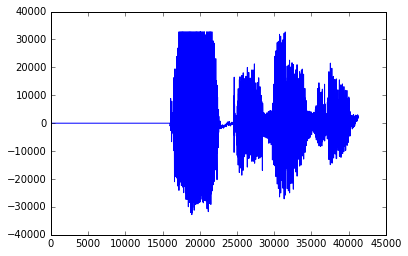

In [3]:
plot(audio)

In [4]:
freqs = np.fft.rfft(audio)

In [5]:
N = len(freqs)

freqs_label = np.arange(0, rate/2, rate/(2*N))
len(freqs_label)

20630

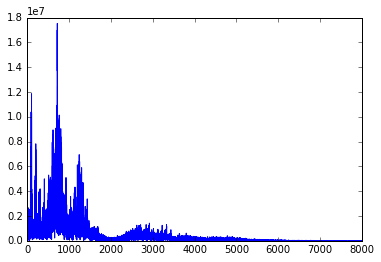

In [6]:
plot(freqs_label, abs(freqs))

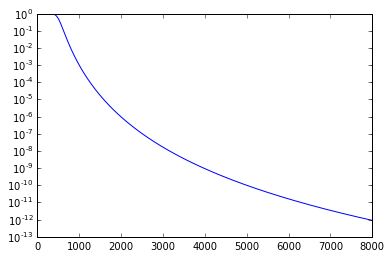

In [7]:
def butterworth(w, wc, order):
    return 1 / (1 + (w/wc)**(2*order))

cutoff = 500

plot(freqs_label, butterworth(freqs_label, cutoff, order=5))
yscale('log')

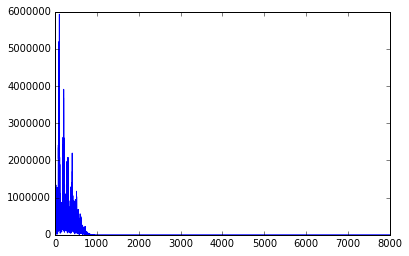

In [8]:
filtered_freqs = 0.5 * freqs * butterworth(freqs_label, cutoff, order=5)

plot(freqs_label, abs(filtered_freqs))

In [9]:
filtered_audio = np.fft.irfft(filtered_freqs)

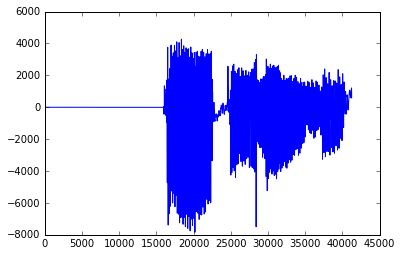

In [10]:
plot(filtered_audio)

In [11]:
scipy.io.wavfile.write("filtrado.wav", rate, filtered_audio)

In [12]:
AudioSegment.from_wav("filtrado.wav")